我們終於要開始做生命中第一個神經網路...

### 7-1初始準備

Keras 可以用各種不同的深度學習套件當底層，我可以指定用Tensorflow 以確保執行的一致性。

    %env KERAS_BACKEND=tensorflow



再來是我們標準數據分析的動作！

In [3]:
%matplotlib inline 
%env KERAS_BACKEND=tensorflow

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

env: KERAS_BACKEND=tensorflow


### 7-2 讀入 MNIST 數據庫

MNIST是有一堆0-9的手寫數字圖庫。有6萬筆訓練資料，1萬筆測試資料。它是'Modified'版的

NIST數據庫，原來的版本有更多資料。這個Modified的版本是由LeCun,Cortes,及Burges等人

做的。可以參考這個數據庫的原始網頁。

MNIST可以說是Deep Learning 最有名的範例，它被Deep Learning 大師 Hinton 稱為「機器學習的果蠅」

### 7.2.1由 Keras 讀入 MNIST

Keras 很貼心的幫我們準備好 MNIST 數據庫，我們可以這樣讀進來(第一次要花點時間)。

In [4]:
from keras.datasets import mnist

C:\Users\Dennis\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

我們來看看訓練資料是不是 6 萬筆、測試資料是不是有 1 筆。

In [7]:
len(x_train)

60000

In [8]:
len(x_test)

10000

特別要注意的是, 萬一在讀的過程中失敗, 你需要找到下載的部份數據集刪去, 然後在一個網路通𣈱的地方再下載一次。

### 7.2.2 數據庫的內容

每筆輸入 (x) 就是一個手寫的 0-9 中一個數字的圖檔, 大小為 28x28。而輸出 (y) 當然就是「正確答案」。我們來看看編號 87 的訓練資料。

In [13]:
X = x_train[87]

In [14]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [15]:
X.shape

(28, 28)

因為是圖檔, 當然可以顯示出來!

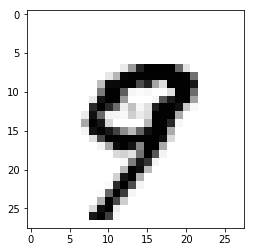

In [20]:
plt.imshow(X,cmap='Greys')

In [21]:
y_train[87]

9

### 7.2.3 輸入格式整理

我們現在要用標準神經網路學學手寫辨識。原來的每筆數據是個 28x28 的矩陣 (array), 但標準神經

網路只吃「平平的」, 也就是每次要 28x28=784 長的向量。因此我們要用 reshape 調校一下。

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
x_test.shape

(10000, 28, 28)

In [29]:
x_train = x_train.reshape(60000,784,1) #or (60000,784)
x_test= x_test.reshape(10000,784,1)

### 7.2.4 輸出格式整理

我們可能會想, 我們想學的函數是這樣的型式:

$$f^:R784→R$$

    其實這樣不太好! 為什麼呢? 比如說我們的輸入 x 是一張 0 的圖, 因為我們訓練的神經網路總會有點誤差, 所以可能會得到:

$$f^(x)=0.5$$

那這意思是有可能是 0, 也有可能是 1 嗎!!?? 可是 0 和 1 根本不像啊。換句話說分類的問題這樣做其實不合理!

於是我們會做 "1-hot enconding", 也就是

1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0]

等等。因為分類問題基本上都要做這件事, Keras 其實已幫我們準備好套件!

In [30]:
from keras.utils import np_utils

In [31]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

我們來看看剛剛是 9 的 87 號數據的答案。